In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


I firstly read out the central $\mu_c$ and then compute the central $\beta_c$, where $\beta_c = \frac{\rho_c \ k_B \ T_c}{\mu_c \ m_u \ P_c}$. 

Next, I will use each "H" burning profile file to do plot: $log_{10}$ T vs. $log_{10}$ $\rho$ .


And then,

I am going to compare the Edd.model: $T=4.62 \times 10^6 \beta \mu (\frac{M}{M_{sun}})^{2/3} \rho^{1/3}$, using the computing temperature T compared with the given temperature T according the given density $\rho$, where I just plot the given T vs. $\rho^{1/3}$ . 

Finally, I plot the grad_T and grad_ad according to the $\rho^{1/3}$ for comparing conveniently. And I consider "grad_T > grad_ad" is convective.



For a 1$M_{\odot}$ star, 

In [6]:
profile_1M_H = Table.read("profile_1M_Hburn.out", format='ascii', #header_start=3, data_start=4,
                            names=['r (R_sun)', 'm (M_sun)', 'rho (g/cm^3)', 'T (K)', 'P (dyn/cm^2)', 'mu', 'mu_e', 'L (L_sun)', 'X', 'Y', 'grad_a', 'grad_T', 'q_nuc (erg/g/s)'])
profile_1M_H

r (R_sun),m (M_sun),rho (g/cm^3),T (K),P (dyn/cm^2),mu,mu_e,L (L_sun),X,Y,grad_a,grad_T,q_nuc (erg/g/s)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0008934959325183466,7.813020660240057e-08,154.2910716421559,15761280.952184664,2.3536211846562928e+17,0.8659707432355597,1.5025914943710077,6.973405003617106e-07,0.33103139417701355,0.6483752752327493,0.3958168718705658,0.330925352392024,0.6601761675093059
0.0011257425357446894,1.5626042341729353e-07,154.28434685579603,15761090.834569847,2.3535353955636493e+17,0.8659543442465449,1.502570863645939,1.394649038114085e-06,0.3310496692468228,0.6483569763637252,0.39581694028043407,0.33092607225144727,0.6601125347977258
0.0014183641255639584,3.125208569360741e-07,154.27635799720755,15760864.491017632,2.3534332622550483e+17,0.8659349141664462,1.5025464194440195,2.7891892628262223e-06,0.33107132301175124,0.648335294301219,0.3958170214274208,0.33092636580048496,0.6600365972825603
0.0017870622684097806,6.250417237516244e-07,154.26367663577557,15760505.197858833,2.3532711436877565e+17,0.8659040682526402,1.5025076129666992,5.578025809628543e-06,0.33110570096823655,0.6483008714363142,0.39581715026308106,0.33092641203575074,0.6599160860733719
0.0022516286746469528,1.2500834573827254e-06,154.24354726595618,15759934.869253263,2.353013816918875e+17,0.8658551003126551,1.5024460064252798,1.1154924908121824e-05,0.3311602807364463,0.6482462204098378,0.3958173548232635,0.3309262831154479,0.6597248610055119
0.0028370172410239368,2.5001669244229164e-06,154.2115977234838,15759029.564844126,2.3526053878731514e+17,0.8657773674238792,1.502348207716462,2.2306267243745267e-05,0.33124693382651127,0.6481594542806305,0.3958176796367765,0.33092599173488674,0.6594214847680482
0.0035747036920852726,5.0003338585032985e-06,154.16089308787647,15757592.574842772,2.3519571777705043e+17,0.865653984563999,1.5021929675160361,4.4601160989610134e-05,0.3313845052627276,0.6480217036023824,0.39581819543920305,0.33092551273888027,0.6589403180158011
0.004504416521752198,1.0000667726664062e-05,154.08043979373318,15755311.7256863,2.3509285375714253e+17,0.8654581790016009,1.5019465863216221,8.916623891468688e-05,0.33160290280043103,0.6478030220383901,0.39581901461846336,0.33092479361909993,0.658177499242304
0.005397529471584274,1.7199137566832355e-05,153.9766578664582,15752367.909970796,2.3496013677603677e+17,0.8652055390591208,1.5016286569302315,0.00015327617234013504,0.3318848280815321,0.6475207310389415,0.3958200726755144,0.33092537312758535,0.6571945735615796


To find and compute central $\mu_c$ and $\beta_c$,


In [43]:
rho = profile_1M_H['rho (g/cm^3)']
rho_c = rho[0]
T = profile_1M_H['T (K)']
T_c = T[0]
mu = profile_1M_H['mu']
mu_c = mu[0]
P = profile_1M_H['P (dyn/cm^2)']
P_c = P[0]
m_u = 1.67 * 10**(-24)
k_B = 1.38 * 10**(-16)

beta = (rho_c * k_B * T_c) / (mu_c * m_u * P_c)
print("mu_c =", mu_c)
print("beta_c = ", beta)

mu_c = 0.8659707432355597
beta_c =  0.9859505582923751


Text(0, 0.5, '$T \\ (K)$')

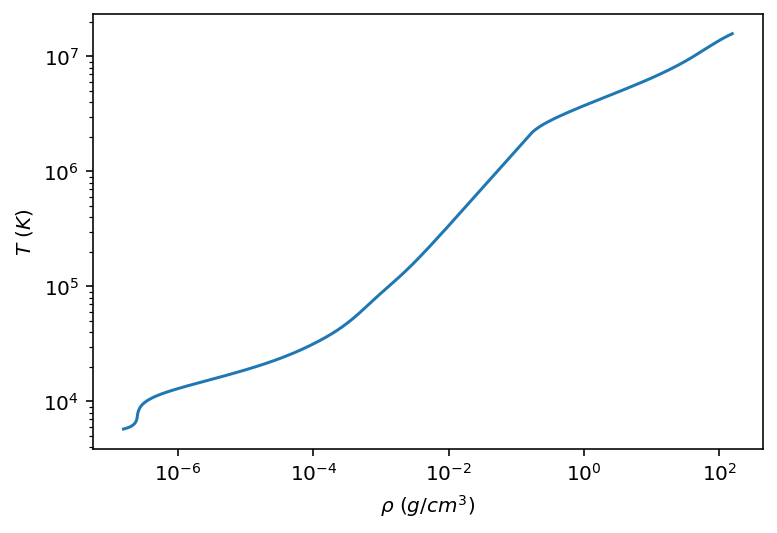

In [8]:
plt.loglog(profile_1M_H['rho (g/cm^3)'], profile_1M_H['T (K)'])
xlabel(r'$\rho \ (g/cm^3)$')
ylabel(r'$T \ (K)$')

<class 'astropy.table.column.Column'>
5.038840894066667


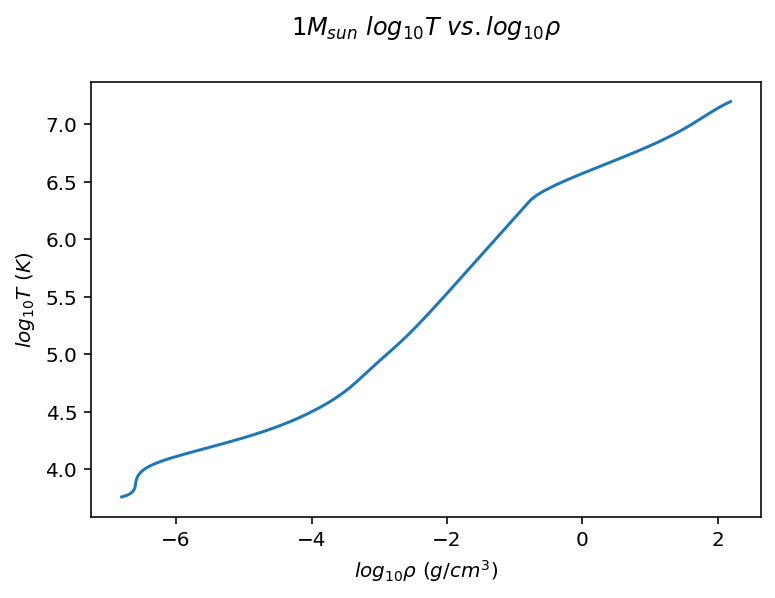

In [45]:
xx = np.log(profile_1M_H['rho (g/cm^3)'])
print(type(xx))
print(xx[0])

plt.plot(np.log10(profile_1M_H['rho (g/cm^3)']), np.log10(profile_1M_H['T (K)']))
xlabel(r'$log_{10}\rho \ (g/cm^3)$')
ylabel(r'$log_{10}T \ (K)$')
plt.title(r'$1M_{sun}\ log_{10}T \ vs.log_{10}\rho$', y=1.08)
plt.savefig('hw6-q3-a1.jpg', bbox_inches='tight')

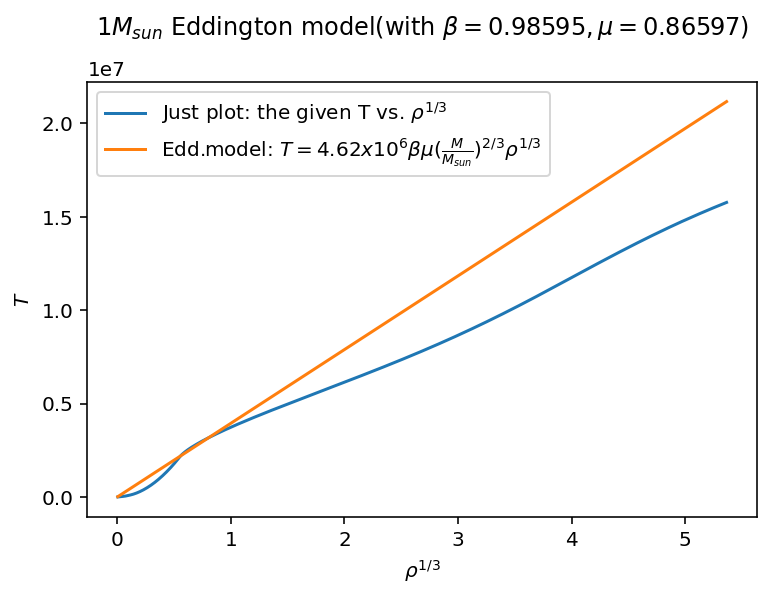

In [84]:
#plt.ylim(0, 3.e7)
plt.plot((profile_1M_H['rho (g/cm^3)'])**(1/3), profile_1M_H['T (K)'], label = r"Just plot: the given T vs. $\rho^{1/3}$")
plt.plot((profile_1M_H['rho (g/cm^3)'])**(1/3), ((profile_1M_H['rho (g/cm^3)'])**(1/3))*3944500, label = r"Edd.model: $T=4.62 x 10^6 \beta \mu (\frac{M}{M_{sun}})^{2/3} \rho^{1/3}$")
plt.legend()
#xlabel(r'$\rho^\frac{1}{3}$')
xlabel(r'$\rho^{1/3}$')
ylabel(r'$T$')
#plt.title('figure_title', y=1.08)
plt.title(r'1$M_{sun}$ Eddington model(with $\beta=0.98595,\mu=0.86597$)', y=1.08)
plt.savefig('hw6-q3-a2.jpg', bbox_inches='tight')

In this 1$M_{\odot}$ star, I found the Eddington model is working well in the "envelope" region. But toward to the center, the Edd.T is increasing higher than the given T. 

Text(0, 0.5, '$grad$')

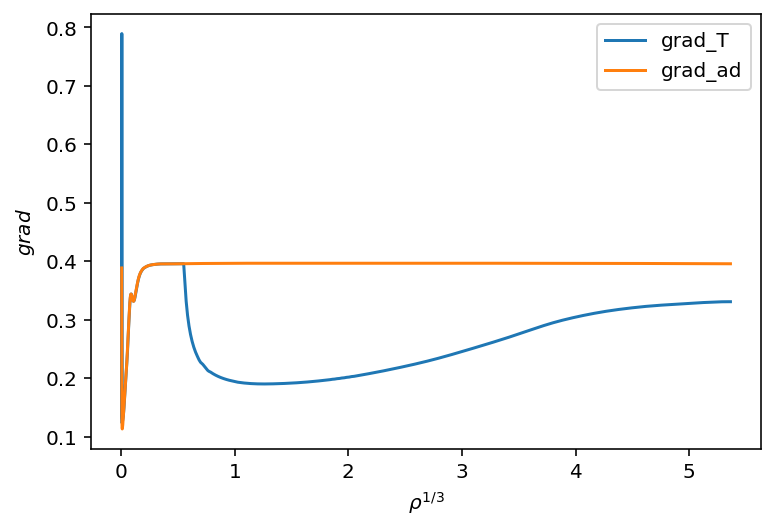

In [78]:
#plt.plot(profile_1M_H['rho (g/cm^3)'], profile_1M_H['grad_T'], label = "T")
#plt.plot(profile_1M_H['rho (g/cm^3)'], profile_1M_H['grad_a'], label = "a")
#plt.plot(profile_1M_H['r (R_sun)'], profile_1M_H['grad_T'], label = "T")
#plt.plot(profile_1M_H['r (R_sun)'], profile_1M_H['grad_a'], label = "a")
plt.plot((profile_1M_H['rho (g/cm^3)'])**(1/3), profile_1M_H['grad_T'], label = "grad_T")
plt.plot((profile_1M_H['rho (g/cm^3)'])**(1/3), profile_1M_H['grad_a'], label = "grad_ad")
plt.legend()
xlabel(r'$\rho^{1/3}$')
ylabel(r'$grad$')

In this 1$M_{\odot}$ star, the convective region is at the "envelope" or near "surface".

For an 8$M_{\odot}$ star,

In [24]:
profile_8M_H = Table.read("profile_8M_Hburn.out", format='ascii', #header_start=3, data_start=4,
                            names=['r (R_sun)', 'm (M_sun)', 'rho (g/cm^3)', 'T (K)', 'P (dyn/cm^2)', 'mu', 'mu_e', 'L (L_sun)', 'X', 'Y', 'grad_a', 'grad_T', 'q_nuc (erg/g/s)'])
profile_8M_H

r (R_sun),m (M_sun),rho (g/cm^3),T (K),P (dyn/cm^2),mu,mu_e,L (L_sun),X,Y,grad_a,grad_T,q_nuc (erg/g/s)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.004443285963201802,6.250300011640252e-07,10.036623443752667,30174330.055063557,3.61514232703745e+16,0.7383868049358303,1.340640796282711,0.009008157011319412,0.49182388687903883,0.48852234614413065,0.3479088011869506,0.34791409613503677,1913.8236175207373
0.005598204072392928,1.250060007430547e-06,10.036466973930379,30174069.35756252,3.615052553344561e+16,0.738386804935825,1.3406407962827038,0.018015008898762022,0.4918238868790469,0.48852234614412215,0.3479091676057114,0.3479136947934817,1913.5457425576917
0.007053326143315214,2.5001200211549724e-06,10.036280688095571,30173758.98302227,3.614945674314285e+16,0.7383868049358158,1.340640796282691,0.036025605257840806,0.49182388687906103,0.4885223461441074,0.3479096038443157,0.3479135905879494,1913.2149656237202
0.00888669724444985,5.000240050135894e-06,10.035984978188006,30173266.291597355,3.614776017410304e+16,0.7383868049358042,1.3406407962826754,0.0720369344916364,0.4918238868790787,0.48852234614408857,0.3479102963340025,0.34791388202735746,1912.6899954762987
0.011196664000221915,1.0000480109874094e-05,10.035515569711102,30172484.185667414,3.614506711518658e+16,0.7383868049357842,1.3406407962826479,0.14402828825373157,0.491823886879109,0.4885223461440565,0.34791139560756623,0.34791473634728665,1911.8569226349437
0.014107167302689134,2.0000960230771766e-05,10.03477043536809,30171242.651077107,3.614079234469924e+16,0.7383868049357503,1.3406407962826012,0.28791165953376363,0.49182388687916095,0.48852234614400153,0.34791314063902246,0.3479164283568515,1910.5351693974728
0.017774426668089472,4.000192047434347e-05,10.03358762229181,30169271.788709603,3.6134007059456536e+16,0.7383868049356914,1.3406407962825209,0.5753632810783048,0.4918238868792502,0.4885223461439073,0.3479159108222175,0.34791940234660007,1908.4386964735793
0.022395393924932033,8.000384096090963e-05,10.03171005994697,30166143.11371196,3.612323732577058e+16,0.7383868049355912,1.3406407962823843,1.1492673451303435,0.4918238868794027,0.4885223461437456,0.3479203085247177,0.3479243707656479,1905.1149794000376
0.026833698820097517,0.0001375965632763311,10.029286379570403,30162103.879273202,3.610933663385506e+16,0.738386804935451,1.3406407962821925,1.9736912887739193,0.4918238868796156,0.48852234614352075,0.34792598677163633,0.34793032047098116,1900.8318624014682


In [67]:
rho2 = profile_8M_H['rho (g/cm^3)']
rho2_c = rho2[0]
T2 = profile_8M_H['T (K)']
T2_c = T2[0]
mu2 = profile_8M_H['mu']
mu2_c = mu2[0]
P2 = profile_8M_H['P (dyn/cm^2)']
P2_c = P2[0]
m_u = 1.67 * 10**(-24)
k_B = 1.38 * 10**(-16)

beta2 = (rho2_c * k_B * T2_c) / (mu2_c * m_u * P2_c)
print("mu2_c = ", mu2_c)
print('beta2 = ', beta2)

mu2_c =  0.7383868049358303
beta2 =  0.9375157122917824


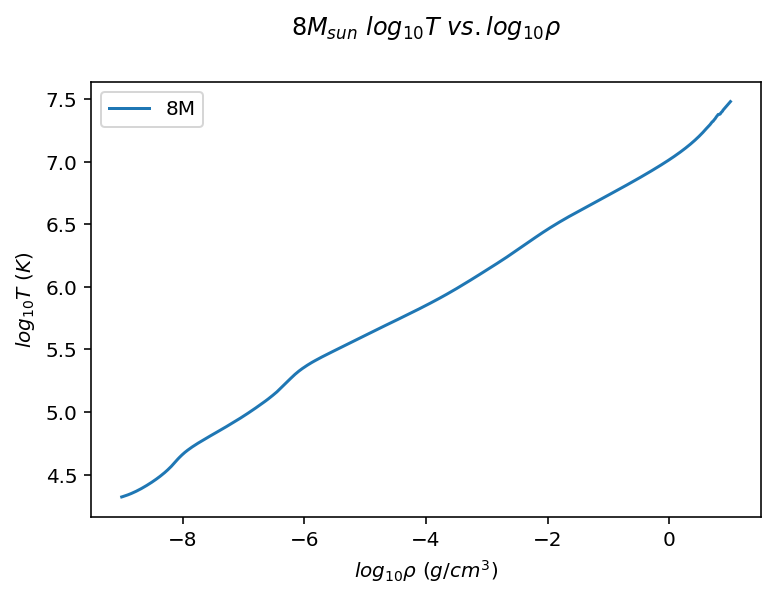

In [77]:
#plt.plot(np.log10(profile_1M_H['rho (g/cm^3)']), np.log10(profile_1M_H['T (K)']), label ="1M")
plt.plot(np.log10(profile_8M_H['rho (g/cm^3)']), np.log10(profile_8M_H['T (K)']), label ="8M")
#plt.plot(np.log10(profile_15M_H['rho (g/cm^3)']), np.log10(profile_15M_H['T (K)']), label ="15M")

xlabel(r'$log_{10}\rho \ (g/cm^3)$')
ylabel(r'$log_{10}T \ (K)$')
plt.title(r'$8M_{sun}\ log_{10}T \ vs.log_{10}\rho$', y=1.08)
#plt.title(r'$1M_{sun}, 8M_{sun}, 15M_{sun}$ Hydrogen burning $log_{10}$T vs. $log_{10}$ $\rho$ plot', y=1.08)
plt.legend()
#plt.savefig('hw6-q3-a1_2.jpg', bbox_inches='tight')

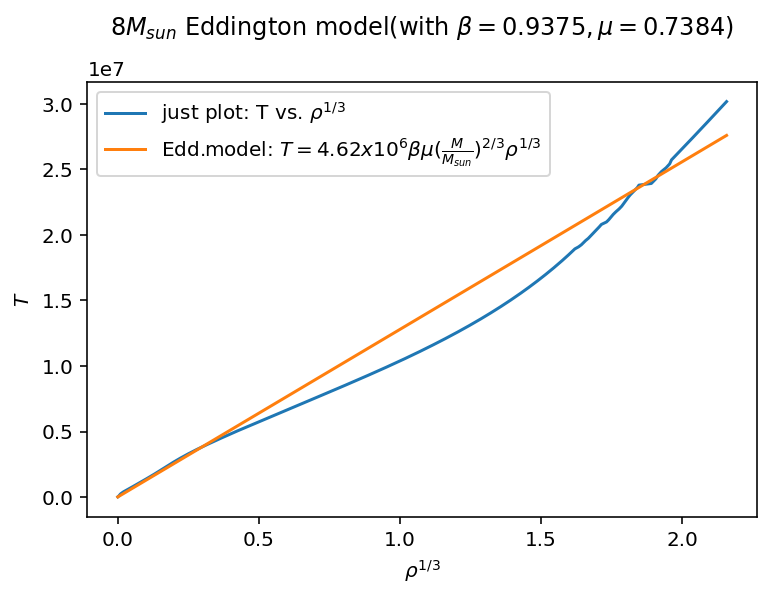

In [83]:
plt.plot((profile_8M_H['rho (g/cm^3)'])**(1/3), profile_8M_H['T (K)'], label = r"just plot: T vs. $\rho^{1/3}$")
plt.plot((profile_8M_H['rho (g/cm^3)'])**(1/3), ((profile_8M_H['rho (g/cm^3)'])**(1/3)) * 4.62 * beta2 * mu2_c * (10**6) * (8**(2/3)) , label = r"Edd.model: $T=4.62 x 10^6 \beta \mu (\frac{M}{M_{sun}})^{2/3} \rho^{1/3}$")
plt.legend()
#xlabel(r'$\rho^\frac{1}{3}$')
xlabel(r'$\rho^{1/3}$')
ylabel(r'$T$')
#plt.title('figure_title', y=1.08)
plt.title(r'8$M_{sun}$ Eddington model(with $\beta=0.9375,\mu=0.7384$)', y=1.08)
plt.savefig('hw6-q3-a2_2.jpg', bbox_inches='tight')

In this 8$M_{\odot}$ star, the Eddington model looks working well with the given data even though the Edd. T is a little up to the area where $\rho^{1/3}$ 0.75 ~ 1.75, or down to the area where $\rho^{1/3}$ > 2.0 .

Text(0, 0.5, '$grad$')

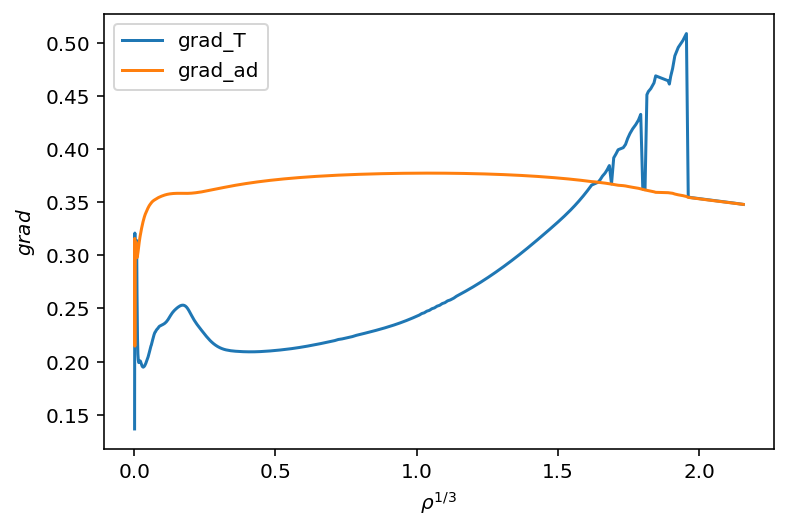

In [79]:
plt.plot((profile_8M_H['rho (g/cm^3)'])**(1/3), profile_8M_H['grad_T'], label = "grad_T")
plt.plot((profile_8M_H['rho (g/cm^3)'])**(1/3), profile_8M_H['grad_a'], label = "grad_ad")
plt.legend()
xlabel(r'$\rho^{1/3}$')
ylabel(r'$grad$')

For this 8$M_{\odot}$ star, the convetive region is from $\rho^{1/3}$ ~1.6 to ~2.0 .

For a 15$M_{\odot}$ star,

In [4]:
profile_15M_H = Table.read("profile_15M_Hburn.out", format='ascii', #header_start=3, data_start=4,
                            names=['r (R_sun)', 'm (M_sun)', 'rho (g/cm^3)', 'T (K)', 'P (dyn/cm^2)', 'mu', 'mu_e', 'L (L_sun)', 'X', 'Y', 'grad_a', 'grad_T', 'q_nuc (erg/g/s)'])
profile_15M_H

r (R_sun),m (M_sun),rho (g/cm^3),T (K),P (dyn/cm^2),mu,mu_e,L (L_sun),X,Y,grad_a,grad_T,q_nuc (erg/g/s)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.006737393383152861,1.1719254496837178e-06,5.39788760535939,33685807.05742583,2.532169548035093e+16,0.6846986642505136,1.266689933445294,0.04845474073124845,0.579025945567818,0.40122282633815115,0.31412001349201957,0.31412853006920094,5480.307445249344
0.00848860539529719,2.343850947779612e-06,5.397805139432158,33685557.562424,2.5321098449489012e+16,0.6846986642505024,1.266689933445278,0.09690356786622187,0.5790259455678379,0.4012228263381298,0.3141202970729866,0.3141275885552549,5479.637096852428
0.010695018682052625,4.6877019427365744e-06,5.397706959152403,33685260.5255552,2.5320387661153652e+16,0.6846986642504873,1.2666899334452568,0.1937871399604647,0.5790259455678638,0.4012228263381023,0.31412063468596463,0.31412696701654086,5478.839109461133
0.013474973029377212,9.375403932650499e-06,5.397551107807084,33684789.007112615,2.5319259374427944e+16,0.6846986642504619,1.2666899334452215,0.3875095837294418,0.579025945567908,0.40122282633805517,0.3141211706139851,0.31412672882857673,5477.572597562357
0.016977590996187675,1.875080791247835e-05,5.397303710140537,33684040.51230356,2.531746838078771e+16,0.6846986642504183,1.2666899334451607,0.7748125940843251,0.5790259455679838,0.40122282633797435,0.3141220213581135,0.3141269923872243,5475.562672052768
0.02139080264747121,3.7501615871937296e-05,5.396910993870917,33682852.33378172,2.5314625482073016e+16,0.6846986642503433,1.2666899334450563,1.5489683726715564,0.5790259455681137,0.40122282633783585,0.31412337187198325,0.31412796091891493,5472.373462257164
0.026951479792932123,7.500323179085519e-05,5.396287604251425,33680966.17186277,2.5310112980950616e+16,0.6846986642502146,1.2666899334448778,3.0958514548924163,0.5790259455683364,0.4012228263375984,0.3141255158021697,0.314129970187159,5467.3142963899945
0.03395825176490439,0.00015000646363002394,5.395298057793232,33677971.95601261,2.530295063694496e+16,0.684698664249995,1.2666899334445716,6.185087296672914,0.5790259455687181,0.40122282633719153,0.3141289194137577,0.314133564794291,5459.291895926216
0.04046077003343934,0.00025369483688403804,5.394050699053738,33674197.09499768,2.5293923142037096e+16,0.6846986642496954,1.2666899334441546,10.447924062055108,0.5790259455692376,0.4012228263366379,0.3141332112769721,0.31413783077805374,5449.19343827922


In [71]:
rho3 = profile_15M_H['rho (g/cm^3)']
rho3_c = rho3[0]
T3 = profile_15M_H['T (K)']
T3_c = T3[0]
mu3 = profile_15M_H['mu']
mu3_c = mu3[0]
P3 = profile_15M_H['P (dyn/cm^2)']
P3_c = P3[0]
m_u = 1.67 * 10**(-24)
k_B = 1.38 * 10**(-16)

beta3 = (rho3_c * k_B * T3_c) / (mu3_c * m_u * P3_c)
print("mu3_c = ", mu3_c)
print('beta = ', beta3)

mu3_c =  0.6846986642505136
beta =  0.8666448233807071


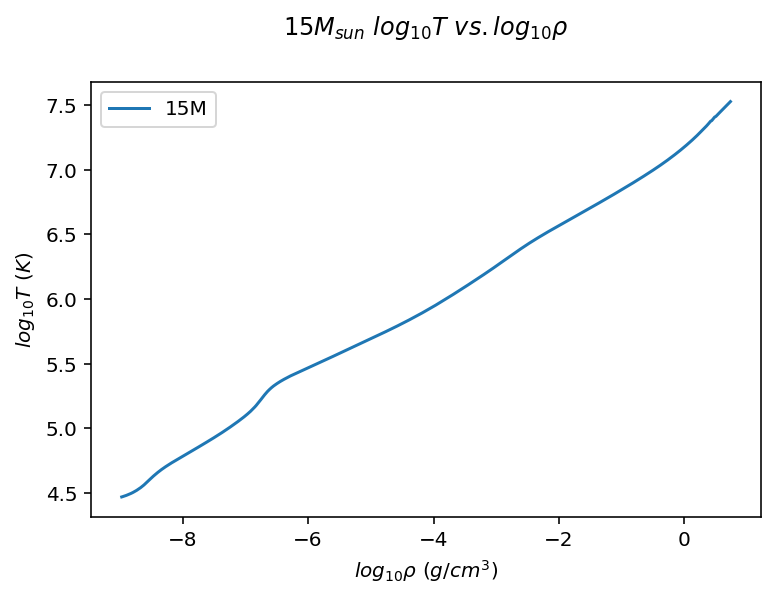

In [76]:
#plt.plot(np.log10(profile_1M_H['rho (g/cm^3)']), np.log10(profile_1M_H['T (K)']), label ="1M")
#plt.plot(np.log10(profile_8M_H['rho (g/cm^3)']), np.log10(profile_8M_H['T (K)']), label ="8M")
plt.plot(np.log10(profile_15M_H['rho (g/cm^3)']), np.log10(profile_15M_H['T (K)']), label ="15M")

xlabel(r'$log_{10}\rho \ (g/cm^3)$')
ylabel(r'$log_{10}T \ (K)$')
plt.title(r'$15M_{sun}\ log_{10}T \ vs.log_{10}\rho$', y=1.08)
#plt.title(r'$1M_{sun}, 8M_{sun}, 15M_{sun}$ Hydrogen burning $log_{10}$T vs. $log_{10}$ $\rho$ plot', y=1.08)
plt.legend()
#plt.savefig('hw6-q3-a1_2.jpg', bbox_inches='tight')

And I am interested in plot the 3 masses in one figure to compare with each other.

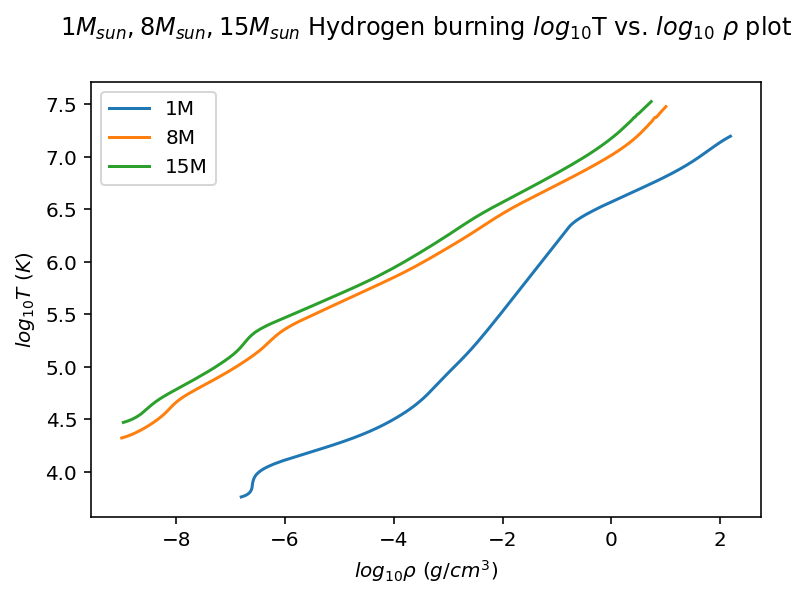

In [60]:
plt.plot(np.log10(profile_1M_H['rho (g/cm^3)']), np.log10(profile_1M_H['T (K)']), label ="1M")
plt.plot(np.log10(profile_8M_H['rho (g/cm^3)']), np.log10(profile_8M_H['T (K)']), label ="8M")
plt.plot(np.log10(profile_15M_H['rho (g/cm^3)']), np.log10(profile_15M_H['T (K)']), label ="15M")

xlabel(r'$log_{10}\rho \ (g/cm^3)$')
ylabel(r'$log_{10}T \ (K)$')
#plt.title(r'$8M_{sun}\ log_{10}T \ vs.log_{10}\rho$', y=1.08)
plt.title(r'$1M_{sun}, 8M_{sun}, 15M_{sun}$ Hydrogen burning $log_{10}$T vs. $log_{10}$ $\rho$ plot', y=1.08)
plt.legend()
#plt.savefig('hw6-q3-a1_2.jpg', bbox_inches='tight')

We can find that the profile or the structure of the low massive star is different with the massive star. 

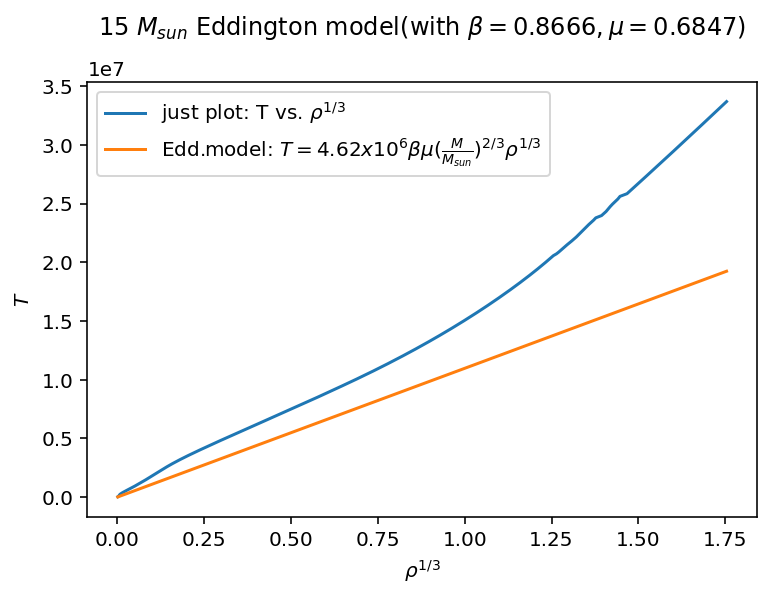

In [82]:
plt.plot((profile_15M_H['rho (g/cm^3)'])**(1/3), profile_15M_H['T (K)'], label = r"just plot: T vs. $\rho^{1/3}$")
plt.plot((profile_15M_H['rho (g/cm^3)'])**(1/3), ((profile_15M_H['rho (g/cm^3)'])**(1/3)) * 4.62 * beta3 * mu3_c * (10**6) * (8**(2/3)) , label = r"Edd.model: $T=4.62 x 10^6 \beta \mu (\frac{M}{M_{sun}})^{2/3} \rho^{1/3}$")
plt.legend()
#xlabel(r'$\rho^\frac{1}{3}$')
xlabel(r'$\rho^{1/3}$')
ylabel(r'$T$')
#plt.title('figure_title', y=1.08)
plt.title(r'15 $M_{sun}$ Eddington model(with $\beta=0.8666,\mu=0.6847$)', y=1.08)
plt.savefig('hw6-q3-a2_3.jpg', bbox_inches='tight')

The Eddington model can relatively well discribe the temperature comparing to the given T date at the low density region, like near "surface" even though the Edd.T is a bit lower than the given T. But as going into more inner region, the modeling temperature is insreasing lower than the given T.

Text(0, 0.5, '$grad$')

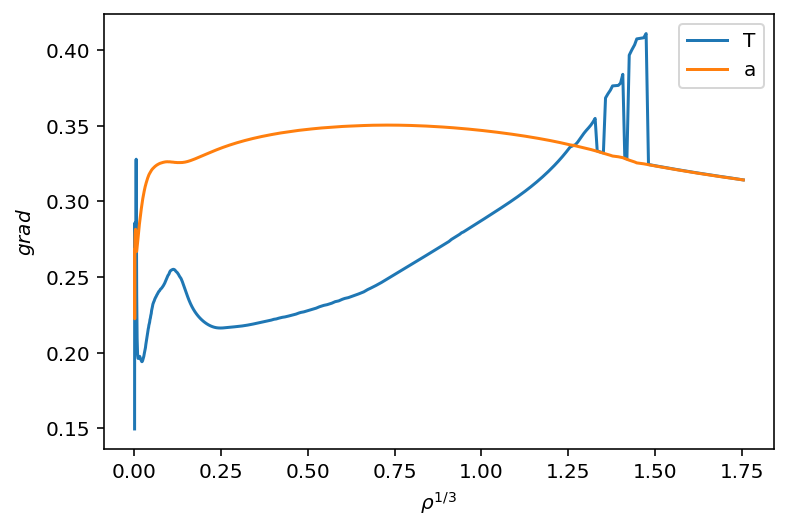

In [62]:
plt.plot((profile_15M_H['rho (g/cm^3)'])**(1/3), profile_15M_H['grad_T'], label = "grad_T")
plt.plot((profile_15M_H['rho (g/cm^3)'])**(1/3), profile_15M_H['grad_a'], label = "grad_ad")
plt.legend()
xlabel(r'$\rho^{1/3}$')
ylabel(r'$grad$')

In a 15$M_{\odot}$ star, the convective region can occur at the "envelope" or near "surface", and somewhat inner eare where $\rho^{1/3}$ is from "1.25" to "1.50".